In [15]:
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import Levenshtein
import matplotlib as mpl
import seaborn as sns
import autoreload
import scipy
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=300)
output_dir='../../figures/'
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Fat': '#e7cb94',
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    return tissue_color_dict



def calculate_v_mu_freq(df):
    df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
    df['v_mu_freq'] = df['distance_to_germline_v'] / df['v_sequence_alignment'].str.len()
    return df

In [2]:
# load data 
scir = pd.read_table('../../data/merged_airr_scirpy.tsv')

In [3]:
color_dict = tissue_colors()

In [4]:
# filter to just BCR
igh = scir[scir.receptor_type == 'BCR']

In [5]:
# Drop Nans from other chain, effectively only look at heavy chains
igh_filtered = igh.dropna(subset=['IR_VDJ_1_v_mu_freq'])

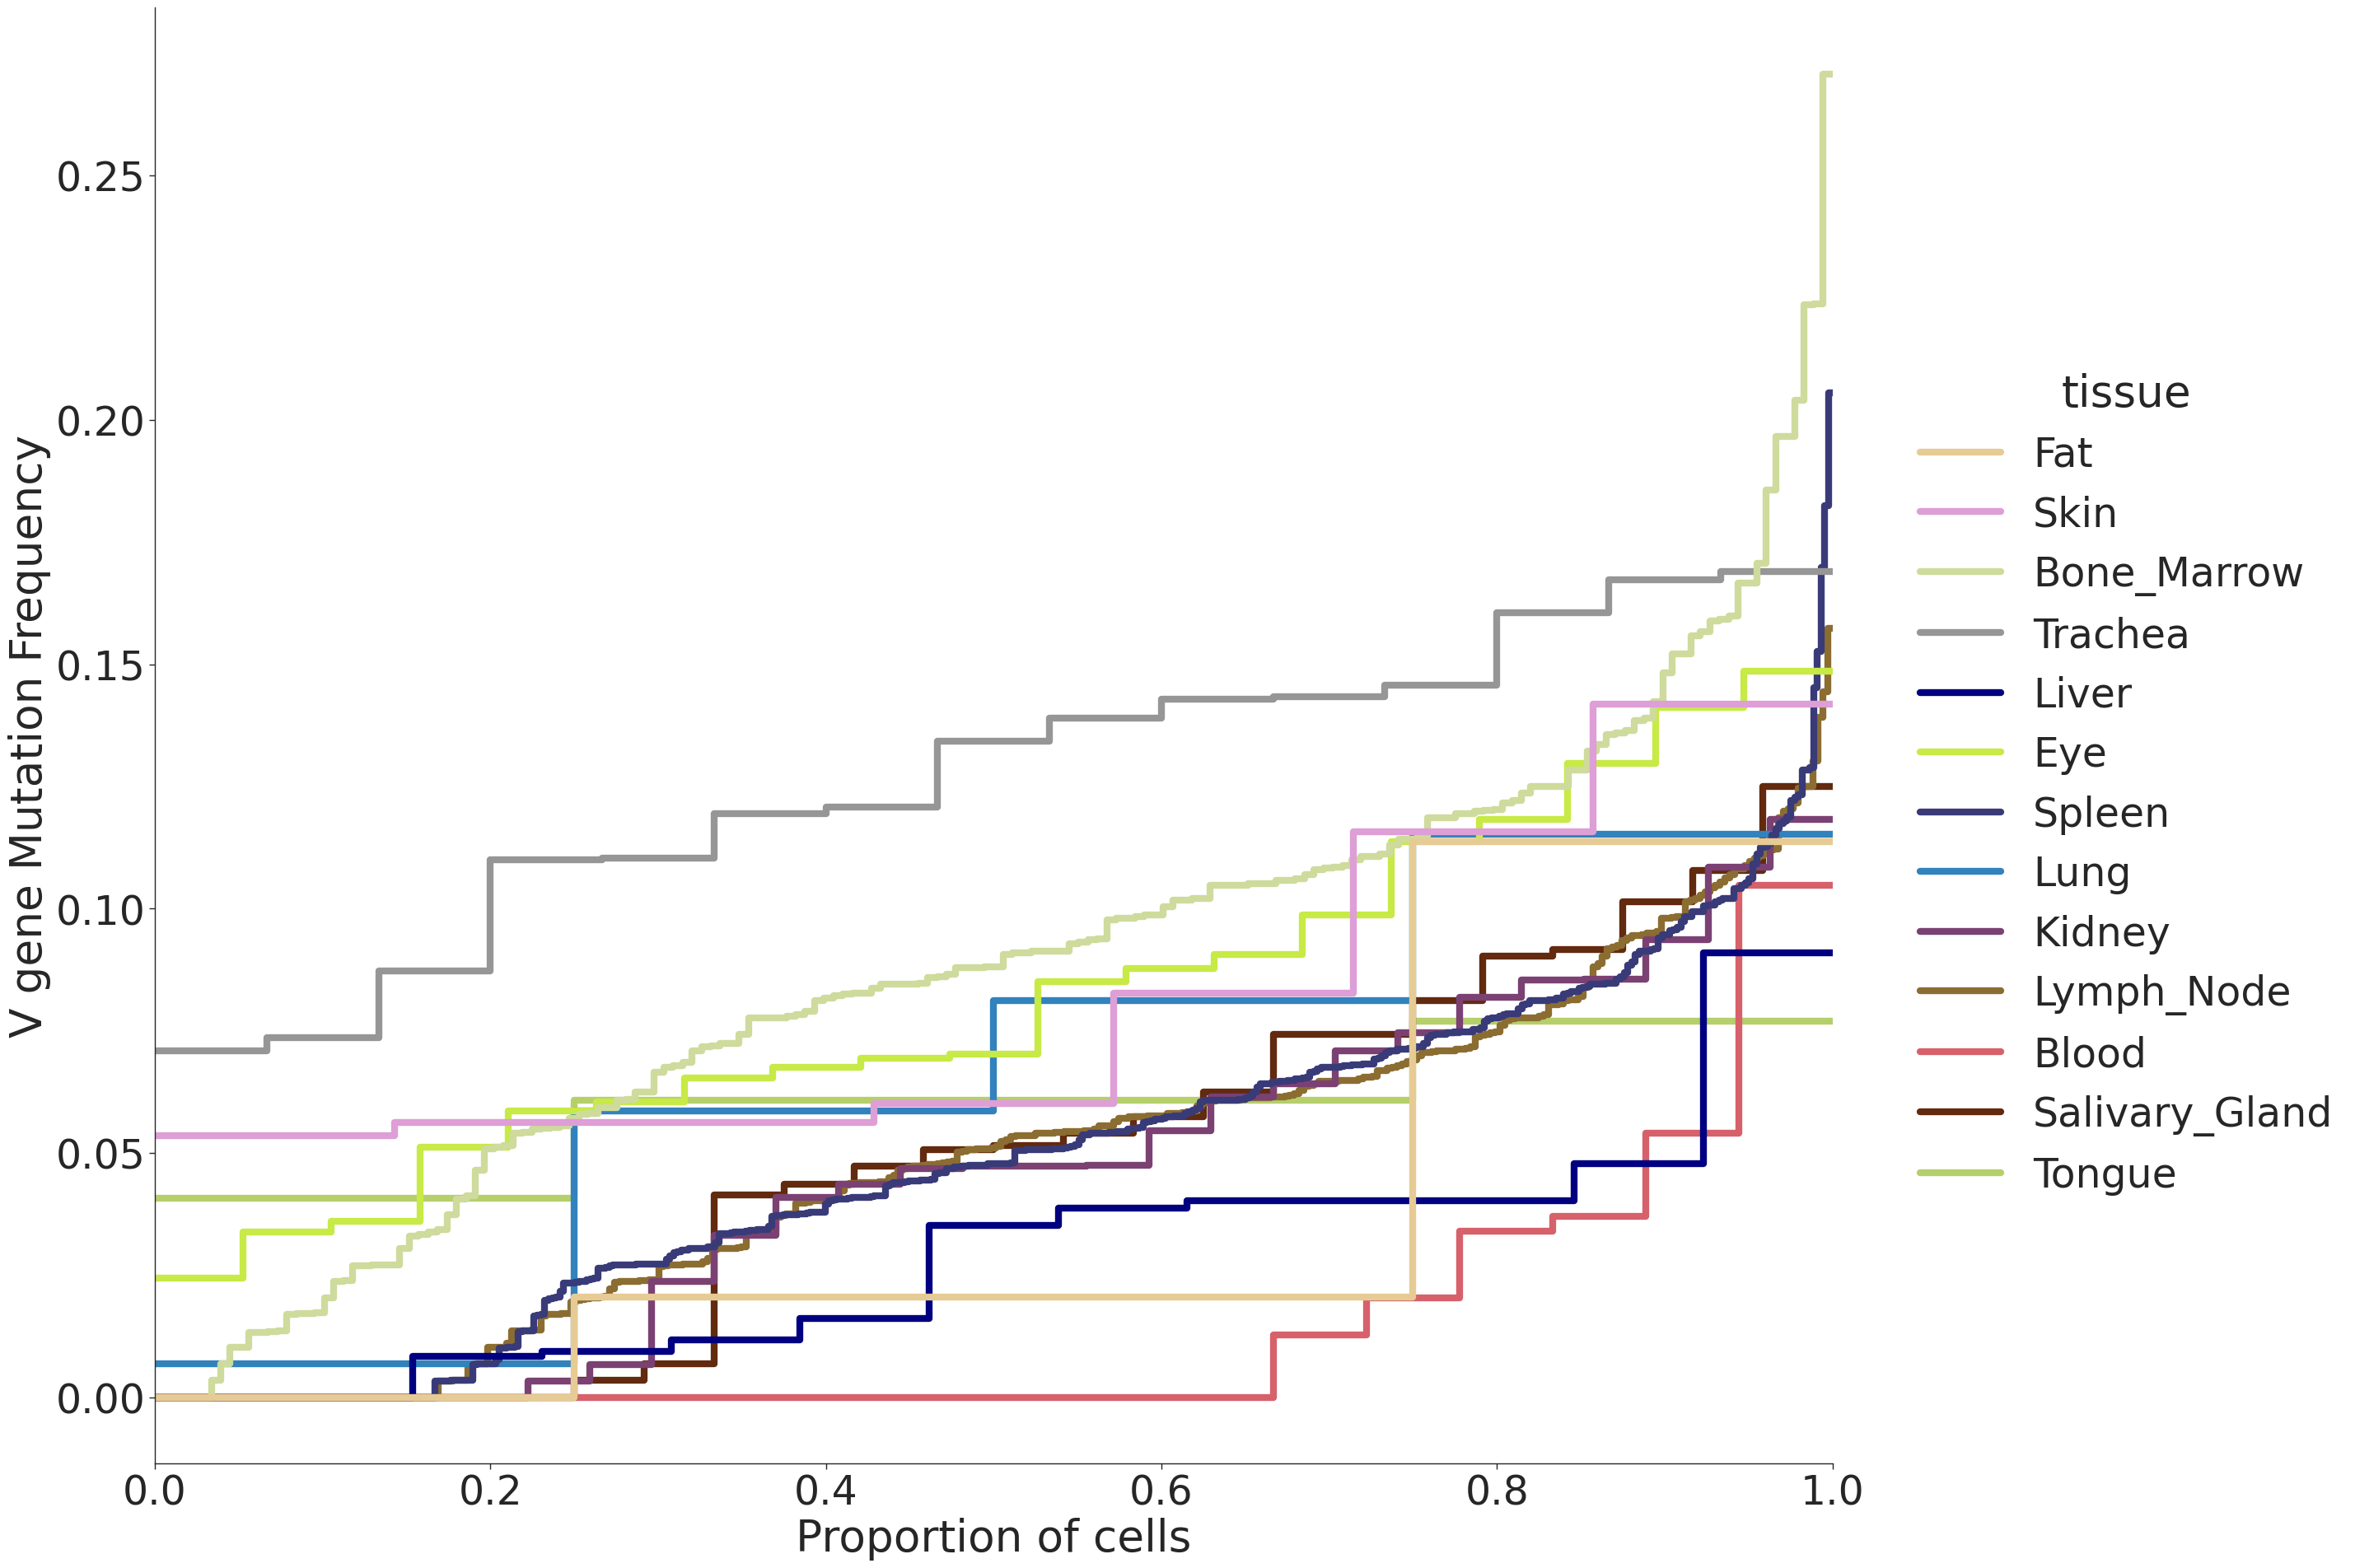

In [6]:
sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'IR_VDJ_1_v_mu_freq'
sel = igh_filtered[hue].value_counts() > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')
g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))


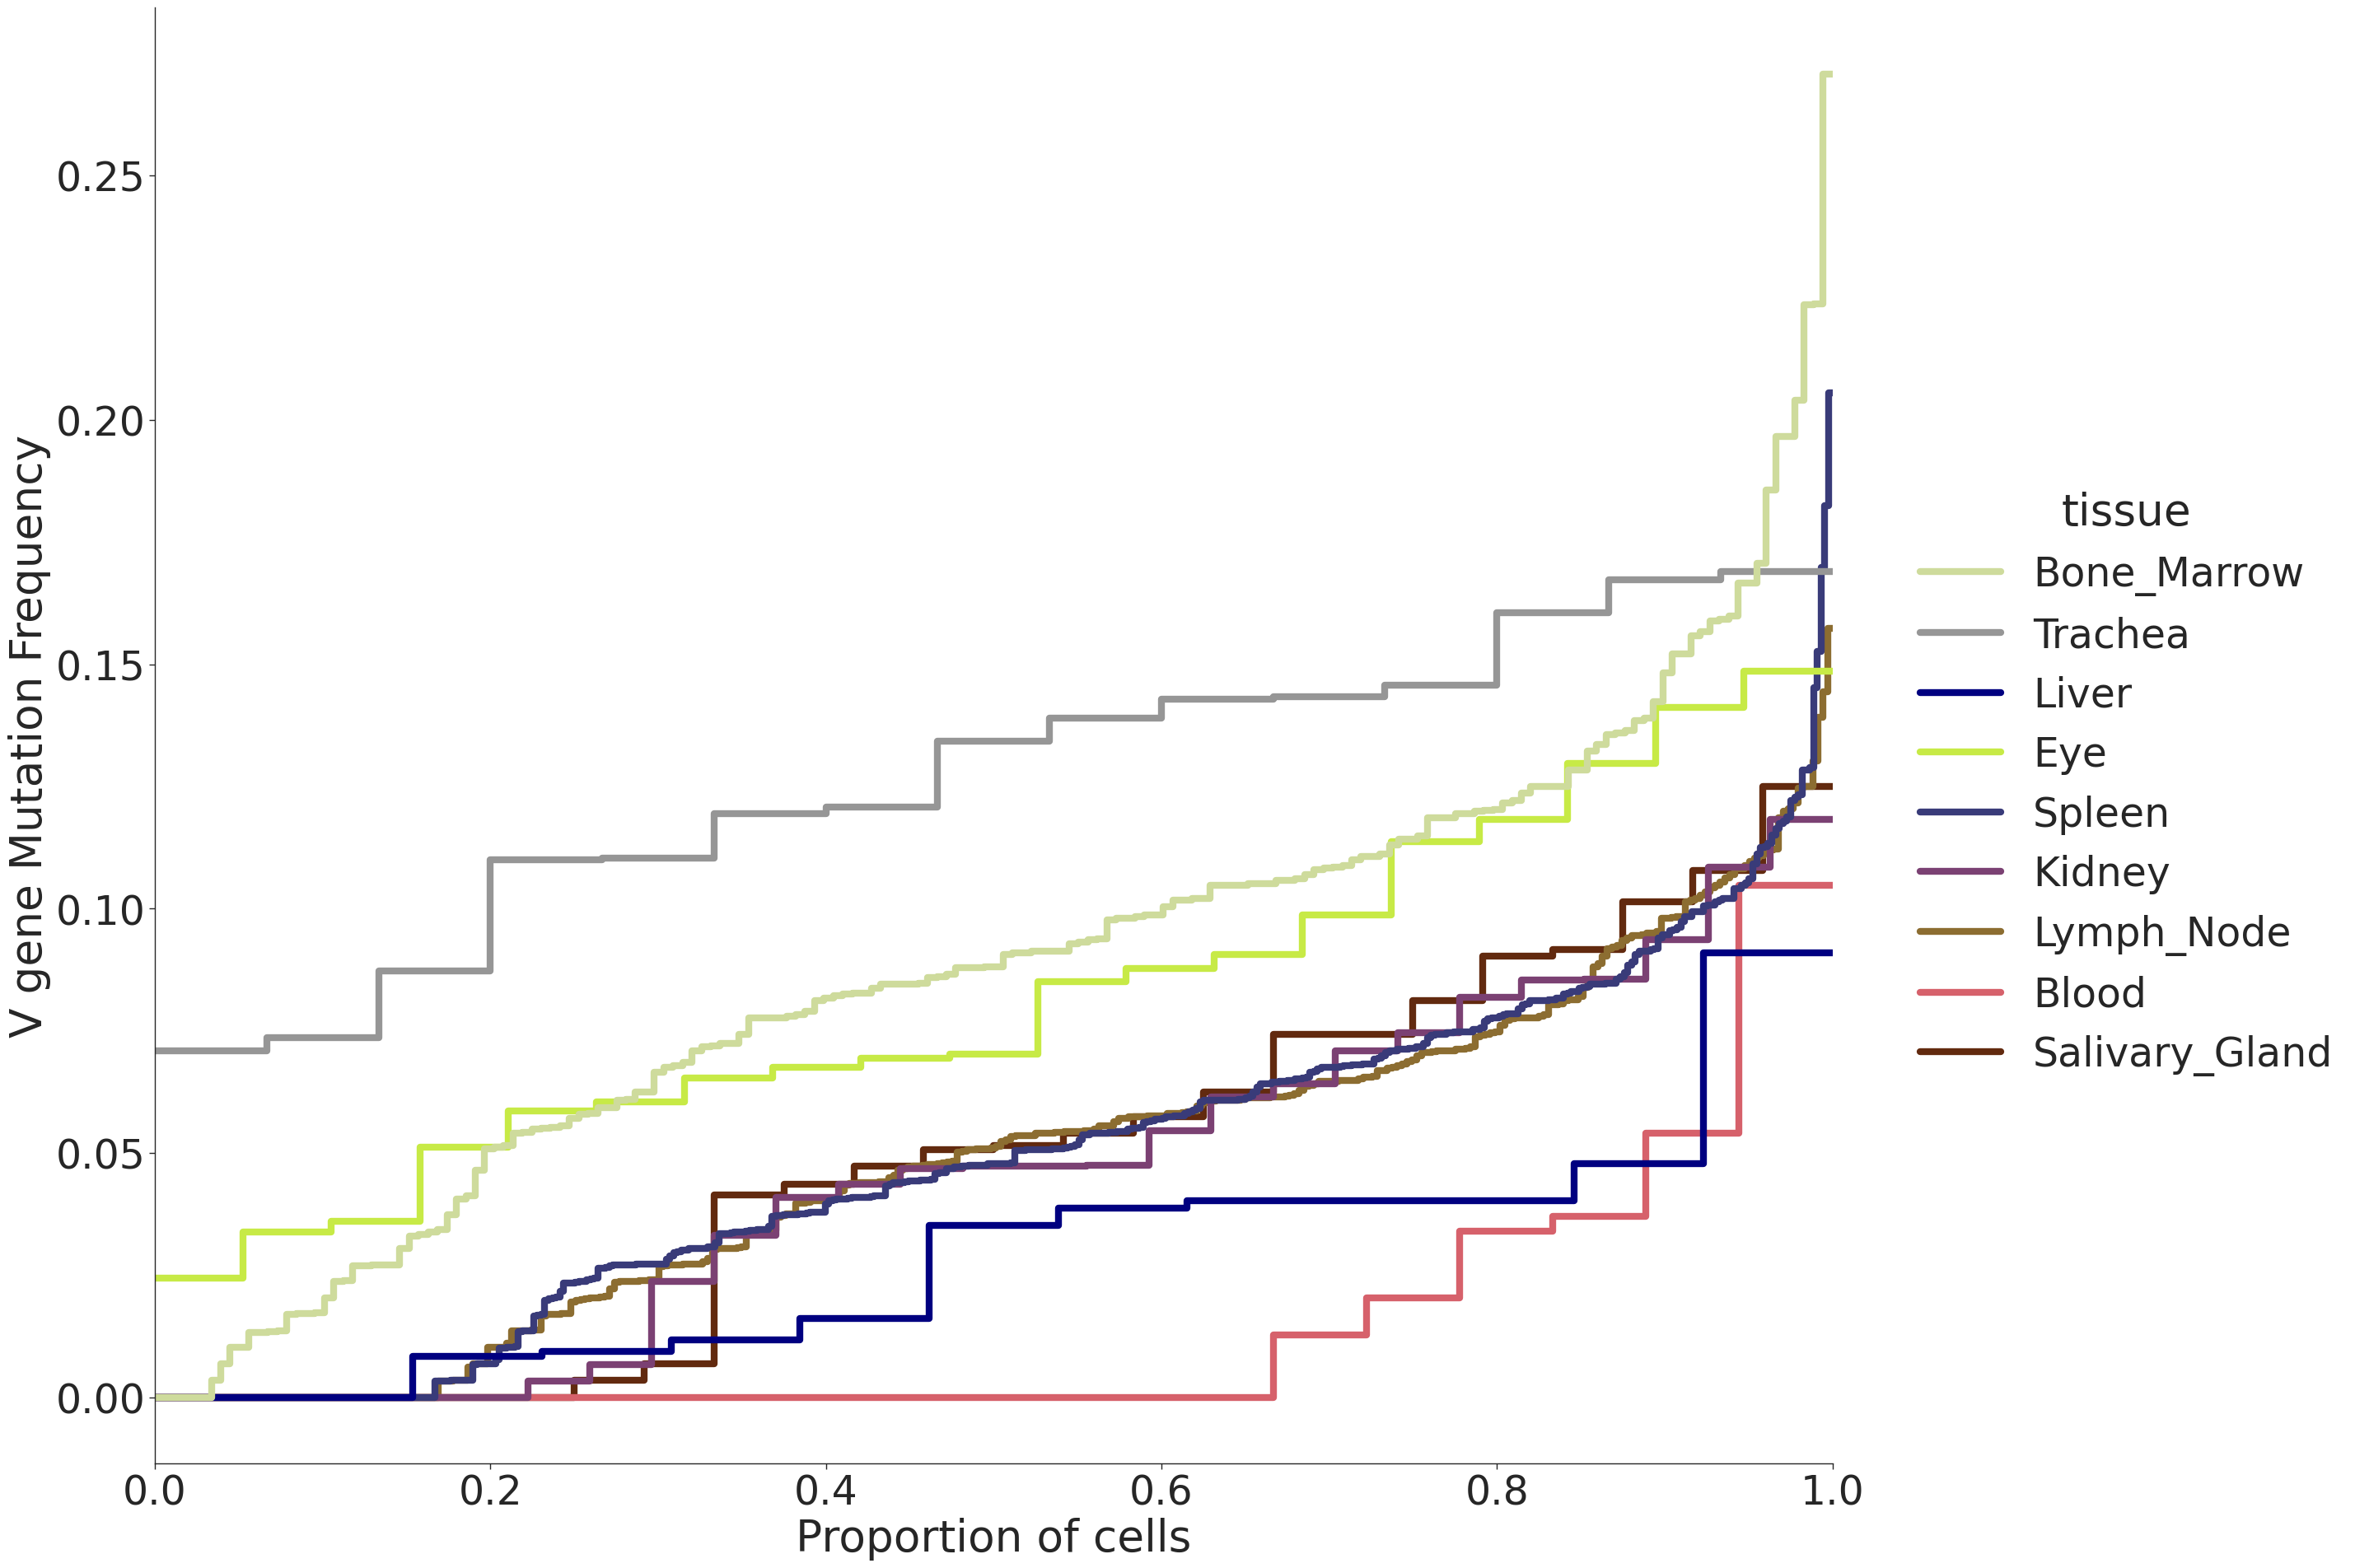

In [7]:
# look at highly sampled tissues

sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'IR_VDJ_1_v_mu_freq'
sel = igh_filtered[hue].value_counts() > 10
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')
g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))

In [8]:
# hyper mutation by cell ontology class

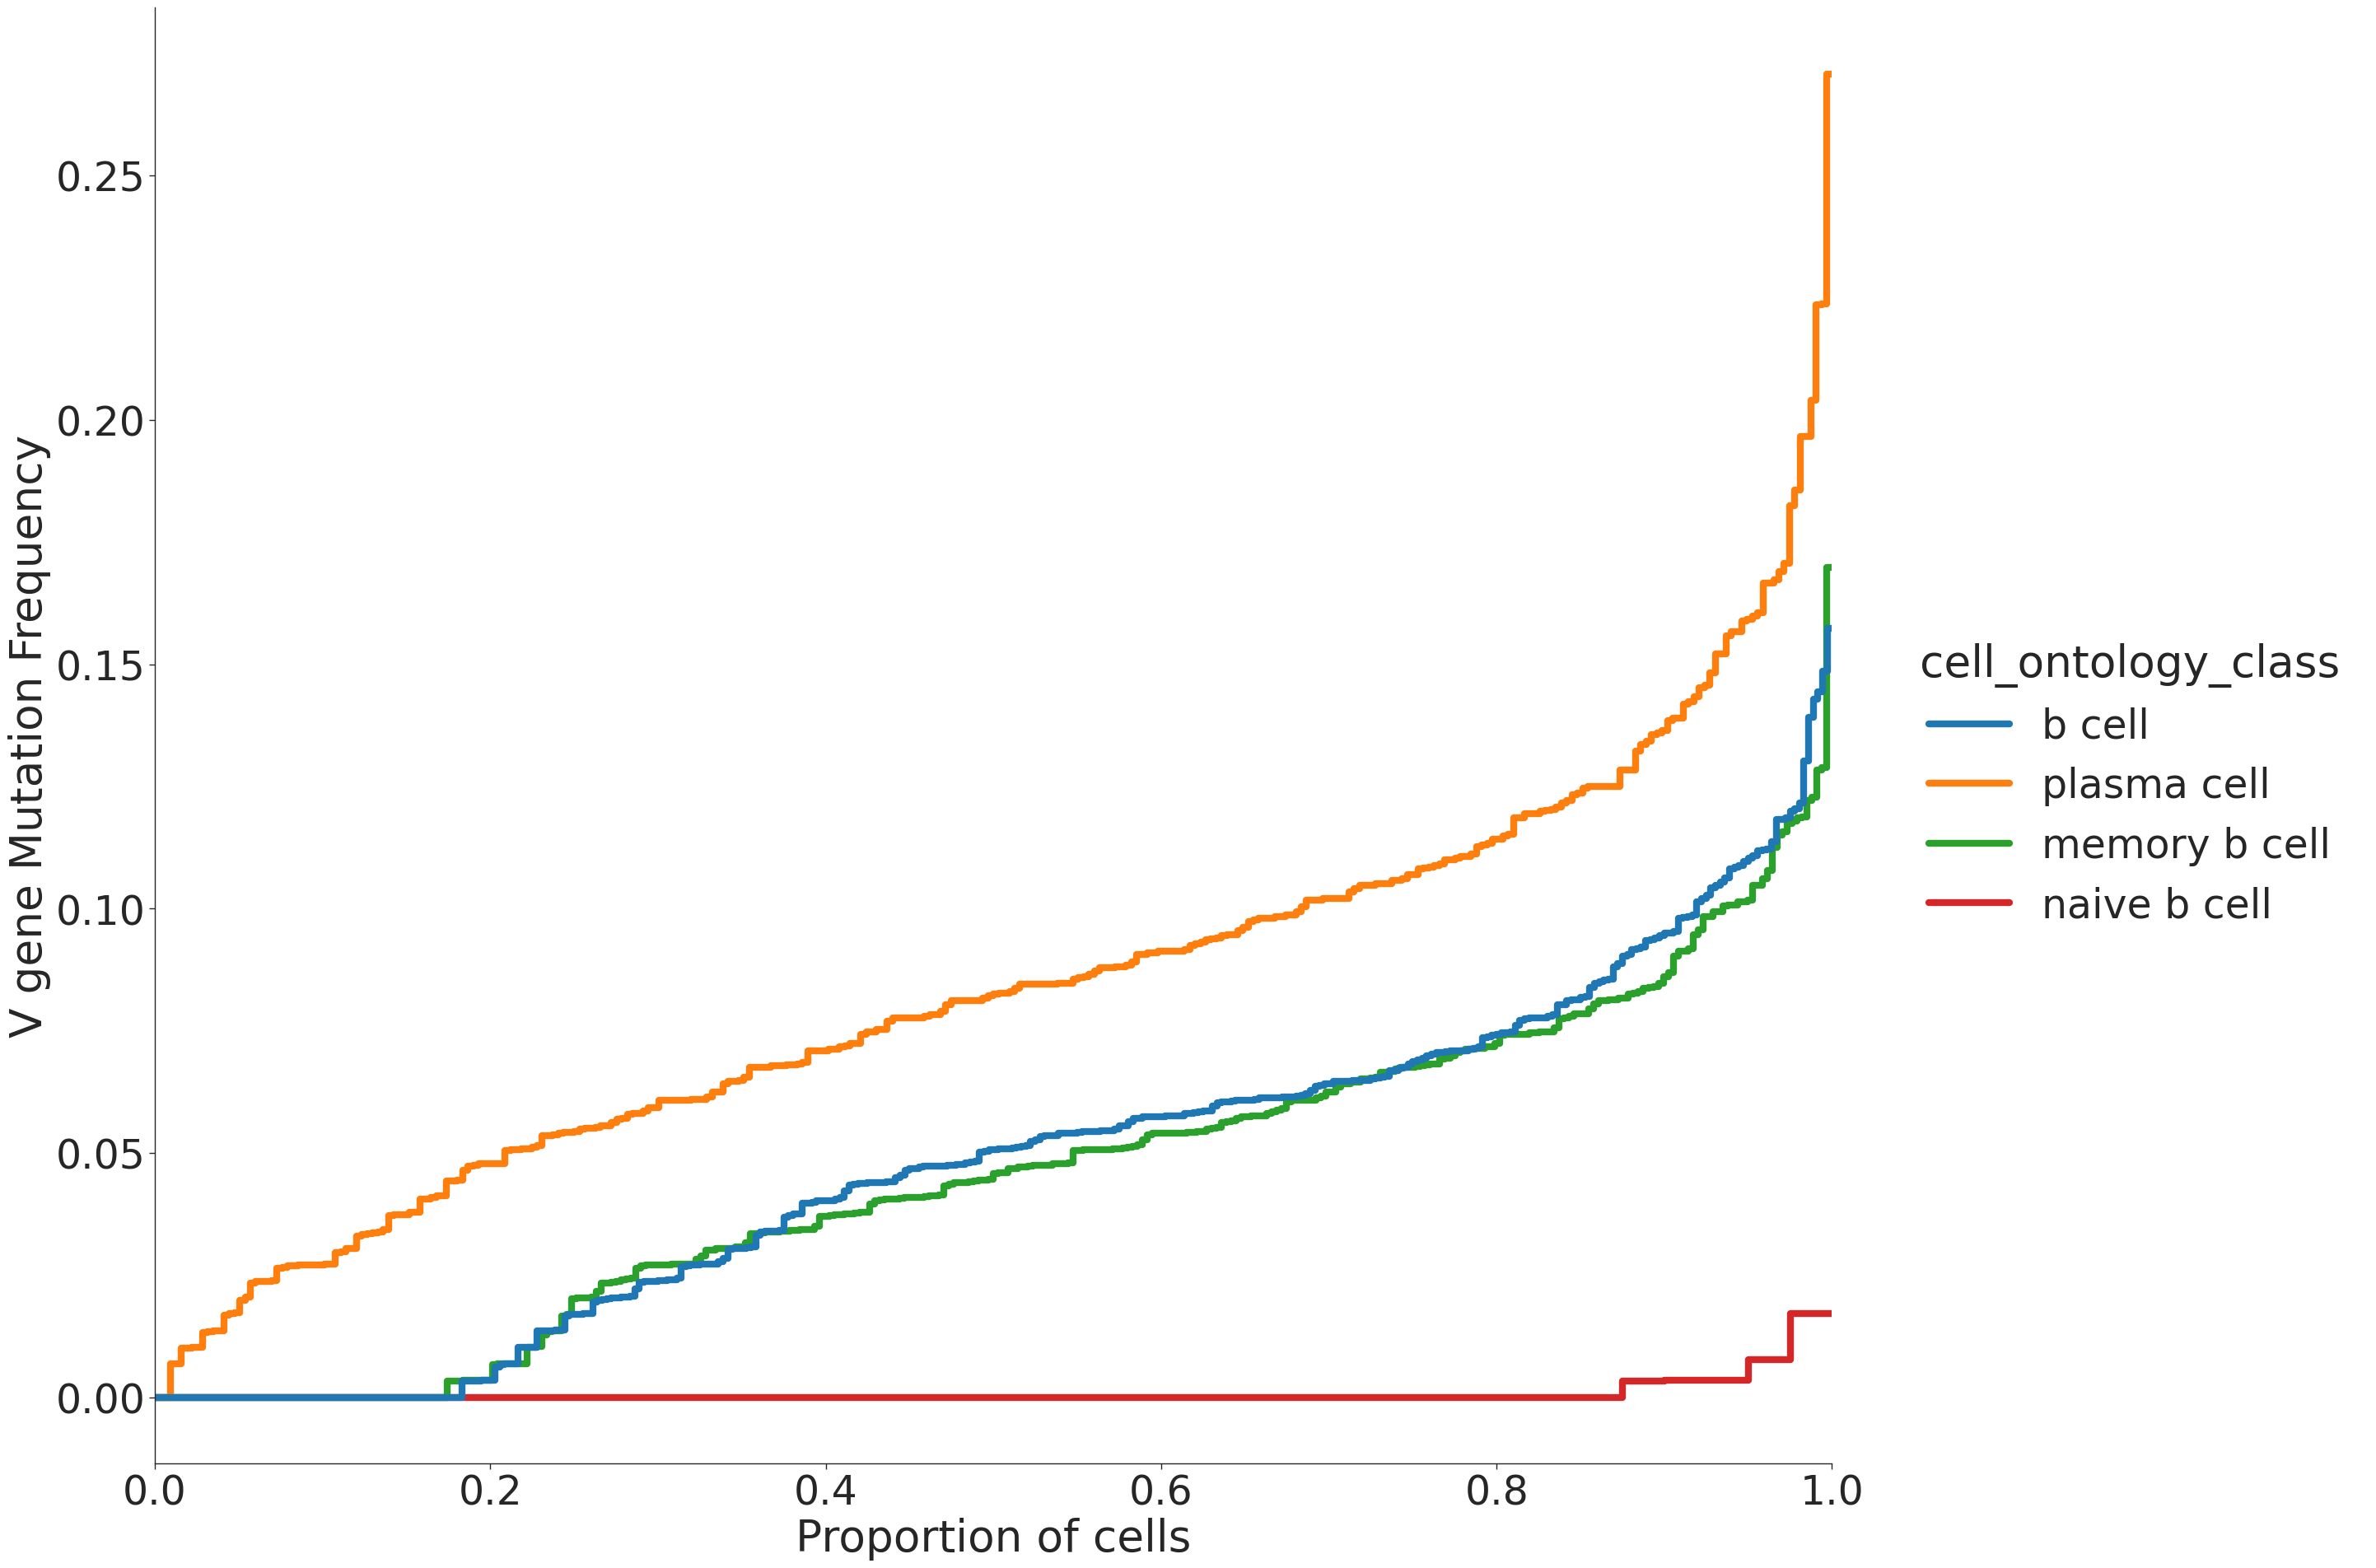

In [9]:
cell_label = 'cell_ontology_class'
bcell_filter = 'b cell|plasma cell'
hue = cell_label
kind = 'ecdf'
mu_freq = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 5
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data = data[data[cell_label].str.contains(bcell_filter)]
g = sns.displot(data, y = data[x], kind=kind, hue=hue, height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')

In [10]:
# calculate means
col = 'cell_ontology_class'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

b cell v-mutation-frequency 0.04726423907117576
memory b cell v-mutation-frequency 0.04501850743424696
mast cell v-mutation-frequency 0.06952500570906595
plasma cell v-mutation-frequency 0.08329749483779254
endothelial cell v-mutation-frequency 0.0600706713780918
plasmablast v-mutation-frequency 0.015147919632969398
naive b cell v-mutation-frequency 0.0008734513406905375
cd8-positive, alpha-beta t cell v-mutation-frequency 0.09739542467158158
neutrophil v-mutation-frequency 0.02396540296963111
classical monocyte v-mutation-frequency 0.06920740841593408
macrophage v-mutation-frequency 0.0812286511319549
monocyte v-mutation-frequency nan
fibroblast v-mutation-frequency 0.08431208053691275
nk cell v-mutation-frequency nan
lacrimal gland functional unit cell v-mutation-frequency 0.08564567059700104
t cell v-mutation-frequency nan
platelet v-mutation-frequency nan
cd8-positive, alpha-beta memory t cell v-mutation-frequency 0.10949996679157319
skeletal muscle satellite stem cell v-mutation-f

In [11]:
# calculate means
col = 'tissue'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

Fat v-mutation-frequency 0.03864958838672612
Skin v-mutation-frequency 0.08092313280080177
Bone_Marrow v-mutation-frequency 0.08804851408031882
Prostate v-mutation-frequency 0.0884353741496598
Trachea v-mutation-frequency 0.12627659845145733
Liver v-mutation-frequency 0.02916043864249129
Eye v-mutation-frequency 0.08158012194894823
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.0485182817123101
Lung v-mutation-frequency 0.06543968227820608
Kidney v-mutation-frequency 0.04589653645911681
Muscle v-mutation-frequency 0.08492225101814141
Lymph_Node v-mutation-frequency 0.04817580864389892
Blood v-mutation-frequency 0.014606236823168313
Salivary_Gland v-mutation-frequency 0.04851497413432351
Tongue v-mutation-frequency 0.059805666161598346


In [12]:
print(igh[igh.tissue == 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Blood")
print(igh[igh.tissue != 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Other Tissues")
print(igh[igh.tissue == 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Blood")
print(igh[igh.tissue != 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Other Tissues")
print(igh[igh.tissue == 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Blood")
print(igh[igh.tissue != 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Other Tissues")

0.014606236823168313 mean in Blood
0.05676127344636572 mean in Other Tissues
0.027817280243315333 standard deviation in Blood
0.041645263284562854 standard deviation in Other Tissues
0.006556595831404949 standard error of the mean in Blood
0.0012637195362641546 standard error of the mean in Other Tissues


/tmp/ipykernel_18694/3069922589.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(igh[igh.tissue == 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Blood")
/tmp/ipykernel_18694/3069922589.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(igh[igh.tissue != 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Other Tissues")
/tmp/ipykernel_18694/3069922589.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(igh[igh.tissue == 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standar

In [13]:
# check pseudobulk assemblies, no filtering or merging

In [16]:
# load
airr = pd.read_table('../../data/snakemake_outputs/combined_igblast.airr.tsv')

# filter 
ig = airr[airr.locus == 'IGH']

ig = calculate_v_mu_freq(ig)

ig['tissue'] = ig.sequence_id.str.split('_', expand=True).iloc[:,1]


# correct 10X cellid format
ig.tissue.replace('contig', 'BM', inplace = True)

/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_18694/654694668.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
/tmp/ipykernel_18694/654694668.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [17]:
# calculate means
col = 'tissue'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

BM v-mutation-frequency 0.09461264217360454
Fat v-mutation-frequency 0.03864958838672616
Skin v-mutation-frequency 0.08757701057062416
Prostate v-mutation-frequency 0.08843537414965986
Trachea v-mutation-frequency 0.12580618604824123
Liver v-mutation-frequency 0.029515385370367974
Eye v-mutation-frequency 0.07318343412317725
Heart v-mutation-frequency 0.1267605633802817
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.05124052918419044
Lung v-mutation-frequency 0.07102109086746308
Kidney v-mutation-frequency 0.04398472788235459
Muscle v-mutation-frequency 0.056614834012094294
SI v-mutation-frequency 0.04406207054512139
LymphNode v-mutation-frequency 0.04973299905110375
Blood v-mutation-frequency 0.014159126654365006
Salivary v-mutation-frequency 0.051225244062911075
Tongue v-mutation-frequency 0.05980566616159837
